В этом файле представлены данные по работе рекламных кампаний, запущенных пятью медиабайерами для привлечения пользователей в приложение.

**Цель:** оценить рекламные кампании в разрезе регионов и медиабайеров.
    
**Задачи:**

1. Определить, для каких кампаний более дешевые установки (CPI).

2. Рассчитать окупаемость рекламных кампаний по медиабайерам. (ROMI)

3. Рассчитать основные метрики конверсии. Определить, в каких регионах рекламные кампании имеют более низкие показатели. 

4. Определить, если ли зависимость между стоимостью установки и остальными метриками. 

5. Выводы и рекомендации.

**Презентация:** https://docs.google.com/presentation/d/1RE_PRnwYgO2B-mP9sFO7O-Y1RDk7HFe2/edit?usp=sharing&ouid=103201138672129860644&rtpof=true&sd=true

**Имеющиеся поля:**

* Campaign_id - ID кампании;
* Geo - геопозиция, на которую настроена рекламная кампания;
* Buyer - байер, выполнивший запуск;
* Impressions - количество показов рекламных объявлений;
* Clicks - количество кликов; 
* Installs - количество установок;
* Registrations - количество регистраций;
* Spend - Затраченная сумма;
* Revenue_ad (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Revenue_in_app (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Payers (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'E:\ЯП/'
df = pd.read_csv(path+'test_data.csv', decimal=',')

In [4]:
df.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6


In [5]:
df.columns = df.columns.str.lower()

In [6]:
# проверка типов данных, пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        87 non-null     int64  
 1   geo                87 non-null     object 
 2   buyer              87 non-null     object 
 3   impressions        87 non-null     int64  
 4   clicks             87 non-null     int64  
 5   installs           87 non-null     int64  
 6   registrations      87 non-null     int64  
 7   spend              87 non-null     float64
 8   revenue_ad1d       87 non-null     float64
 9   revenue_in_app1d   87 non-null     float64
 10  payers1d           87 non-null     int64  
 11  revenue_ad7d       87 non-null     float64
 12  revenue_in_app7d   87 non-null     float64
 13  payers7d           87 non-null     int64  
 14  revenue_ad30d      87 non-null     float64
 15  revenue_in_app30d  87 non-null     float64
 16  payers30d          87 non-nu

In [7]:
df['geo'].unique()

array(['north america', 'western europe', 'cis', 'north africa',
       'latin america', 'tropical africa', 'australia oceania'],
      dtype=object)

**Всего в данных содержится информация об 87 рекламных кампаниях по 7 регионам, запущенных 5 медиабайерами.**

### Распределение по регионам и медиабайерам

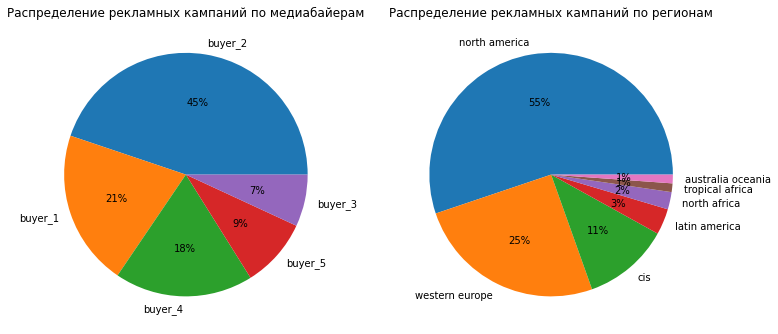

In [8]:
plt.figure(figsize = (12,12))
plt.subplot(1, 2, 1)
df['buyer'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Распределение рекламных кампаний по медиабайерам')
plt.subplot(1, 2, 2)
df['geo'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Распределение рекламных кампаний по регионам');

**45% кампаний приходится на медиабайра №2, 21% и 18% на медиабайеров №1 и №4, соответственно.**

**Больше половины кампаний (55%) запущены в Северной Америке, 25% в Восточной Европе и 11% в странах СНГ**. На остальные регионы приходится менее по 1-3%, поэтому по данным регионам будет мало информации.

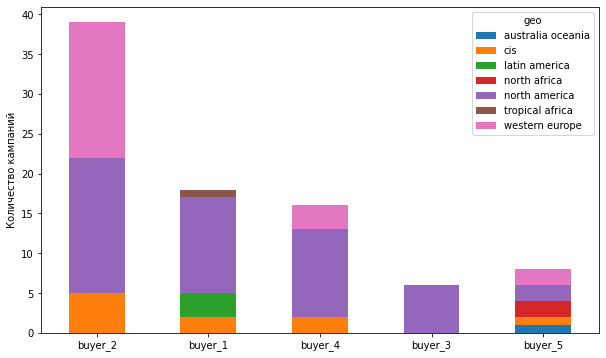

In [9]:
df.groupby(['buyer', 'geo'])['campaign_id'].count().unstack().sort_values(by = 'north america', \
ascending = False).plot(kind='bar', stacked=True, figsize = (10, 6))
plt.xlabel('')
plt.xticks(rotation = 0)
plt.ylabel('Количество кампаний');

**Медиабайер №3 запускал кампании только в Северной Америке, медиабайер №5 имеет запуски по 5 регионам.**

## 1. Определить, для каких кампаний более дешевые установки (CPI).

В задании указана метрика CPI (Cost Per Install), то есть предполагается, что столбец spend относится именно к установкам и оплата производится по установкам.

Формула для расчета: **CPI = Ad Spend / Installs From Campaign**

In [10]:
df['cpi'] = df['spend']/df['installs']

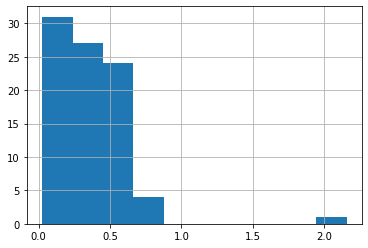

In [11]:
df['cpi'].hist();

Большинство значений находится в диапазоне до 1 у.е. за установку. Хорошо виден **выброс в 2 у.е.**

In [12]:
# проверка выброса
df.query('cpi > 2')

,campaign_id,geo,buyer,impressions,clicks,installs,registrations,spend,revenue_ad1d,revenue_in_app1d,payers1d,revenue_ad7d,revenue_in_app7d,payers7d,revenue_ad30d,revenue_in_app30d,payers30d,cpi
80,81,australia oceania,buyer_5,2185,53,10,9,21.549999,1.187304,0.0,0,1.212664,0.0,0,1.212664,0.0,0,2.155


**Данный выброс** характерен для единственной **кампании в Австралии и Океании, запущенной медиабайром №5.** 

In [82]:
# функция для построения боксплота
def boxplot_func(df, column, by, num, ed):
    ax = df.boxplot(column=[column], by=by, ax = axes[num])
    plt.xticks(rotation = 45)
    ax.set_title(f'Распределение {column} по {by}')
    ax.set_xlabel('')
    ax.set_ylabel(f'{column}, {ed}')
    plt.suptitle('')

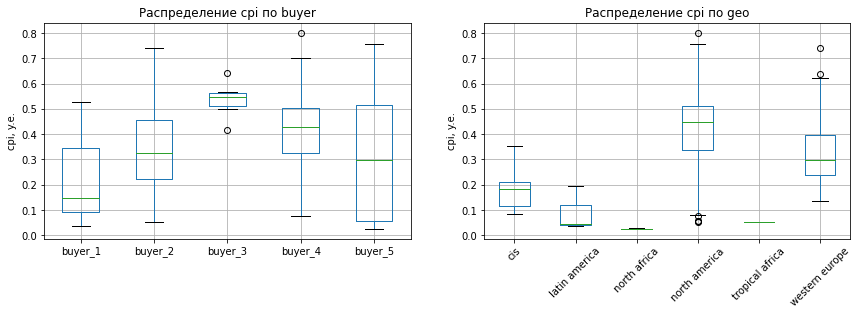

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df.query('cpi < 2'), 'cpi', 'buyer', 0, 'y.e.')
boxplot_func(df.query('cpi < 2'), 'cpi', 'geo', 1, 'y.e.')

При рассмотрении CPI без верхнего выброса видно, что **максимальная медиана CPI характерна для медиабайера №3**, минимальная для медиабайера №1. 

Среди регионов самое высокое значение медианы CPI в Северной Америке и Восточной Европе. **Более "дешевые" установки у кампаний в Африке и Латинской Америке.**

In [16]:
# топ 5 кампаний с низким значением CPI
df.query('cpi <= cpi.quantile(0.05)')[['campaign_id', 'geo', 'buyer', 'impressions', 'registrations', 'spend', 'cpi']]\
.sort_values(by = 'cpi').head(5).style.background_gradient()

,campaign_id,geo,buyer,impressions,registrations,spend,cpi
20,21,north africa,buyer_5,794504,6218,204.389999,0.025330
55,56,north africa,buyer_5,154149,851,43.500000,0.027341
44,45,latin america,buyer_1,113452,1195,69.079998,0.035084
26,27,latin america,buyer_1,295356,1880,143.820002,0.045905
40,41,north america,buyer_2,100570,714,82.389999,0.051174


Таким образом, низкие значения CPI характерны для крупных рекламных кампаний по Северной Африке (медиабайер №5) и по Латинской Америке (медиабайер №1).

In [18]:
# топ 5 кампаний с высоким значением CPI
df[['campaign_id', 'geo', 'buyer', 'impressions', 'registrations', 'spend', 'cpi']]\
.sort_values(by = 'cpi', ascending = False).head(5).style.background_gradient()

,campaign_id,geo,buyer,impressions,registrations,spend,cpi
80,81,australia oceania,buyer_5,2185,9,21.549999,2.155000
19,20,north america,buyer_4,39441,231,233.390001,0.802027
36,37,north america,buyer_5,9923,88,96.740000,0.755781
65,66,western europe,buyer_2,4379,17,27.459999,0.742162
53,54,north america,buyer_4,4778,31,45.010000,0.703281


**Выводы:**

1) Диапазон значений CPI от 0.025 у.е. до 2.155 у.е., но для большей части рекламных кампаний это значение ниже 1 у.е.

2) **Наиболее дешевые установки (CPI) характерны для регионов Африки и Латинской Америки**, соответственно для медиабайеров №1 и №5. Наиболее дорогие в регионах Северной Америки и Восточной Европе, но имеется большой разброс в зависимости от рекламной кампании (даже у одного медиабайера).

### 2. Основные метрики конверсии

Рассчитаем **конверсию по всем действиям** (воронка: показы -> клики -> установка -> регистрация). 

#### 2.1. CTR

In [19]:
# конверсия кликов из показов (CTR)
df['ctr'] = df['clicks']/df['impressions']*100

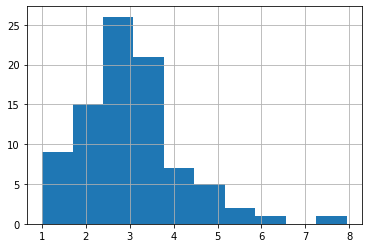

In [20]:
df['ctr'].hist();

Диапазон значений CTR от 1 до 8%. **Для большей части кампаний характерны значения в диапазоне от 2.5 до 3.7%.** На графике выделяется кампания с CTR выше 7%.

In [21]:
# кампания с CTR выше 7%
df.query('ctr > 7')

,campaign_id,geo,buyer,impressions,clicks,installs,registrations,spend,revenue_ad1d,revenue_in_app1d,payers1d,revenue_ad7d,revenue_in_app7d,payers7d,revenue_ad30d,revenue_in_app30d,payers30d,cpi,ctr
23,24,north america,buyer_1,201923,16025,2836,1944,156.430002,92.957284,11.29,4,117.630269,12.4,5,129.256093,20.039999,5,0.055159,7.936193


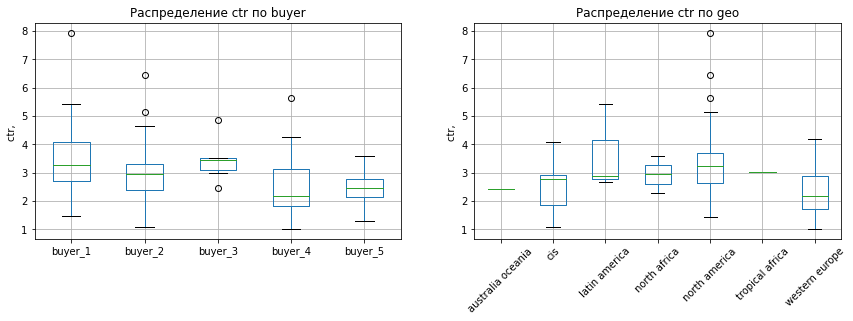

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'ctr', 'buyer', 0, '%')
boxplot_func(df, 'ctr', 'geo', 1, '%')

**Значения до 8% как было видно ранее характерны для крупной кампании от медиабайера №1 в Северной Америке.** По медиане CTR меиабайера №1, №2, №3 имеют наиболее высокие показатели (3% и выше).

**Наименьшая медиана CTR характерна для региона - Восточная Европа**, кампании по Австралии и Африке представлены в слишком малом количестве. **В кампаниях по Северной Америке есть 3 значения более 5%.**

#### 2.2. Количество установок на клик (CTI)

In [23]:
df['cti'] = df['installs']/df['clicks']*100

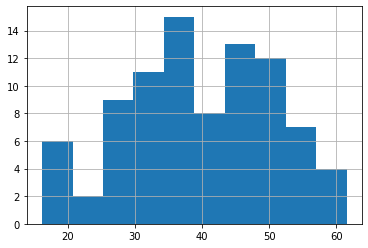

In [24]:
df['cti'].hist();

Диапазон значений CTI от 16 до 60%, что является высоким показателем.

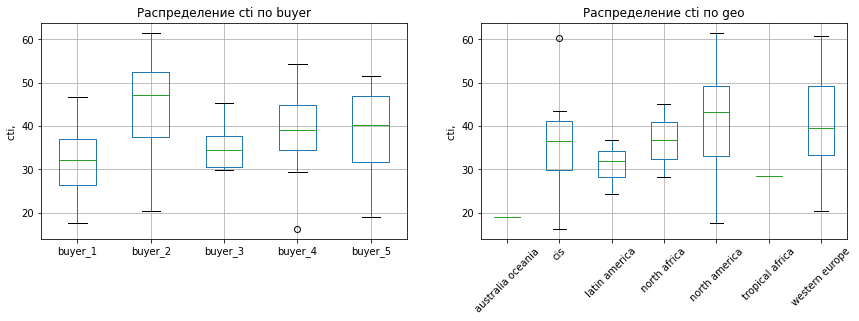

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'cti', 'buyer', 0, '%')
boxplot_func(df, 'cti', 'geo', 1, '%')

**Для медиабайреа №2 характерно самое высокое значение медианы**, при этом у его рекламных кампаний самый высокий разброс значений.

**Высокие показатели медианы CTI (от 35% до 45%) характерны для регионов Северной Америки, Восточной Европы, СНГ, Северной Африки.** При этом диапазон значений для кампаний по Северной Америке и Восточной Европе колеблется от 18% до 60%, то есть присутствуют как менее, так и более успешные кампании.

#### 2.3. Install-to-Register Conversion Rate

In [26]:
df['cr_reg'] = df['registrations']/df['installs']*100

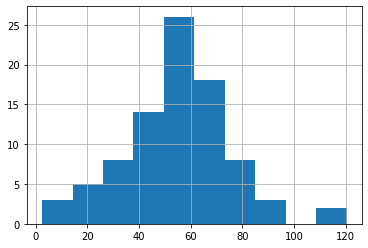

In [27]:
df['cr_reg'].hist();

Распределение имеет вид нормального, есть выброс в более 100%, скорее всего регистраций с одной установки было больше. Диапазон значений от 100% до 120%. **Для большей части кампаний характерно значение от 50% до 70%.**

In [28]:
# кампания с более 100% 
df.query('cr_reg > 100') 

,campaign_id,geo,buyer,impressions,clicks,installs,registrations,spend,revenue_ad1d,revenue_in_app1d,...,revenue_ad7d,revenue_in_app7d,payers7d,revenue_ad30d,revenue_in_app30d,payers30d,cpi,ctr,cti,cr_reg
62,63,north america,buyer_4,8164,118,64,77,29.920000,34.161366,0.0,...,43.789066,0.0,0,67.051895,0.0,0,0.467500,1.445370,54.237288,120.312500
71,72,western europe,buyer_4,15080,152,61,71,24.110001,10.013834,0.0,...,14.020487,0.0,0,14.777514,0.0,0,0.395246,1.007958,40.131579,116.393443


Возможно, ошибка в данных или с одного устройства несколько раз выполняли регистрацию разным способом/под разные имена. Обе кампании от медиабайера №4.

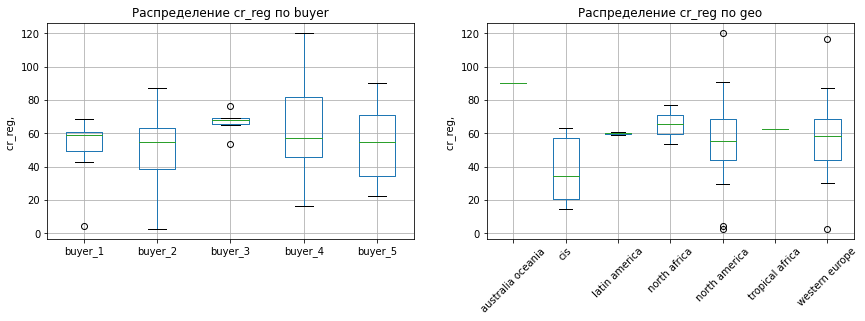

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'cr_reg', 'buyer', 0, '%')
boxplot_func(df, 'cr_reg', 'geo', 1, '%')

**Медиана практически не различается по медиабайерам.** Есть кампании, для которых не было регистраций после установки. 

Высокие значения характерны для районов, где мало данных. Например, в кампании в Австралии из 10 установок было 9 регистраций, соответственно значение медианы выше всего на графике. 

#### 2.4. IPM = кол-во установок / 1000 показов

In [30]:
df['ipm'] = df['installs']/(df['impressions']/1000)

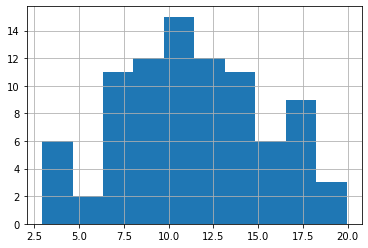

In [31]:
df['ipm'].hist();

Диапазон значений от 3 до 20 установок на 1000 показов. 

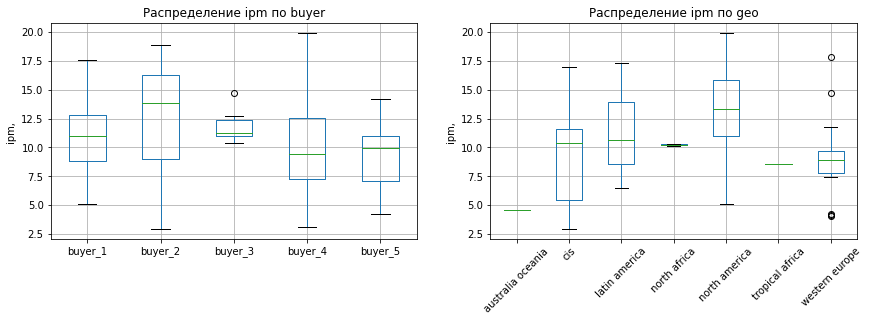

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'ipm', 'buyer', 0, '')
boxplot_func(df, 'ipm', 'geo', 1, '')

**Наиболее высокое значение медианы IPM у медиабайера №2.**

По регионам выделяется Северная Америка, при этом разброс значений от 5 до 20 установок на 1000 показов.

#### 2.5. Conversion Rate 

Так как приложение может получать доход из двух источников: с рекламы и с покупок внутри приложения, то целевым действием можно считать регистрацию, поэтому рассчитаем общую конверсию, **как количество регистраций/количество показов.**

In [35]:
df['cr'] = df['registrations']/df['impressions'] * 100

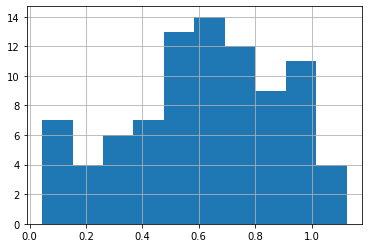

In [36]:
df['cr'].hist();

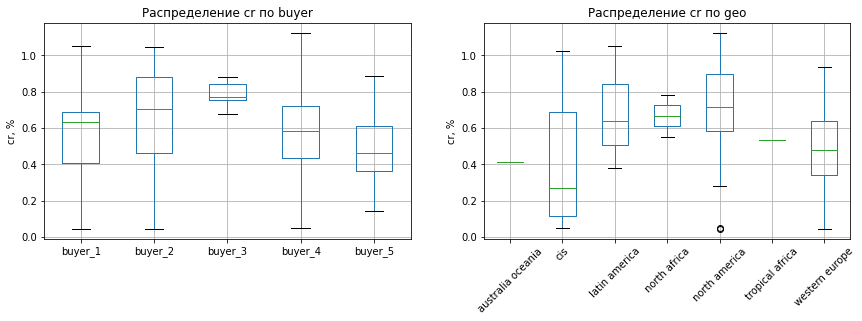

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'cr', 'buyer', 0, '%')
boxplot_func(df, 'cr', 'geo', 1, '%')

**Медиана конверсии из показов в регистрации примерно на одном уровне для регионов Латинской Америки, Африки и Северной Америки**. Наиболее низкое значение медианы в СНГ.

**Гипотезы**: 
    
    1. Ожидается, что чем выше CTR --> тем выше значение CTI --> выше значение CR_reg (более заинтересованная аудитория) 
    
    2. Чем выше CPI, тем выше показатели для конверсий.

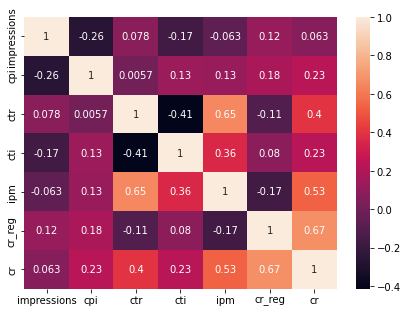

In [38]:
# корреляционная матрица
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(df.query('cpi < 2')\
            [['geo', 'buyer', 'impressions', 'cpi', 'ctr', 'cti', 'ipm', 'cr_reg', 'cr']].corr(), annot = True, ax=ax);

**Линейной зависимости между CPI и показателями конверсии нет.**

Между значением CTR и CTI слабая отрицательная связь, между CTI и CR_reg связь отсутствует.

In [98]:
# средние показатели по регионам и медиабайерам
df.groupby(['geo', 'buyer'])[['ctr', 'cti', 'ipm', 'cr_reg', 'cr', 'cpi']].mean().style.background_gradient()

Средние метрики конверсий различаются по медиабайерам и региона, нет одного, у которого бы были лучше все метрики. 

**По общей конверсии из показов в регистрации** (метрика, которая наиболее важна для дальнейшей выручки с пользователей) лидирует медиабайер №3 и медиабайеры №2 (при это CPI в среднем меньше) и №4 для кампаний по Северной Америке. 

**Выводы:**

1) **Для большей части кампаний значения CTR в диапазоне от 2.5 до 3.7%.** По медиане CTR меиабайера №1, №2, №3 имеют наиболее высокие показатели (3% и выше). Наименьшая медиана CTR характерна для региона - Восточная Европа.

2) Диапазон значений CTI от 16 до 60%, что является высоким показателем. **Высокие показатели медианы CTI (от 35% до 45%) характерны для регионов Северной Америки, Восточной Европы, СНГ, Северной Африки.** При этом диапазон значений для кампаний по Северной Америке и Восточной Европе колеблятся от 18% до 60%, то есть присутствуют как менее, так и более успешные кампании.

3) IPM находится в диапазоне от 3 до 20 установок на 1000 показов. **Наиболее высокое значение медианы IPM у медиабайера №2.**

4) Медиана конверсии из показов в регистрации примерно на одном уровне для регионов Латинской Америки, Африки и Северной Америки. Наиболее низкое значение медианы CR в СНГ. По общей конверсии из показов в регистрации (метрика, которая наиболее важна для дальнейшей выручки с пользователей) **лидирует медиабайер №3 и медиабайеры №2 (при это CPI в среднем меньше) и №4 для кампаний по Северной Америке.**

5) Не было выявлено зависимости между CPI и метриками конверсии.

### 3. Окупаемость рекламных кампаний по медиабайерам (ROMI).

**Доходы в приложении складываются из 2 источников: покупки внутри приложения и реклама.** Рассмотрим, показатели для этих источников.

#### 3.1 Paying Share

Пользователями будут считаться люди, прошедшие регистрацию. 

**Формула для расчета:** количество платящих на 30-й день / количество регистраций.

In [45]:
df['ps_1'] = df['payers1d']/df['registrations']
df['ps_7'] = df['payers7d']/df['registrations']
df['ps_30'] = df['payers30d']/df['registrations']

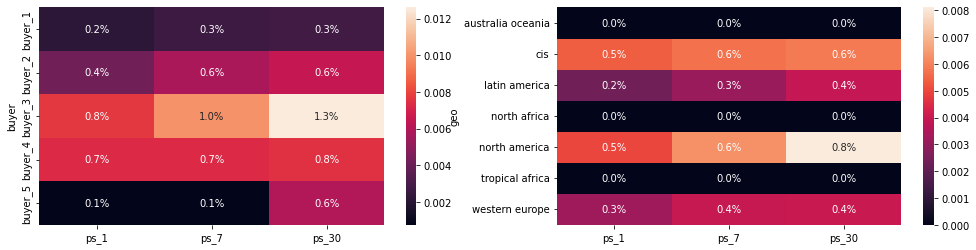

In [46]:
plt.figure(figsize = (17, 4))
plt.subplot(1, 2, 1)
sns.heatmap(df.groupby('buyer')['ps_1', 'ps_7', 'ps_30'].mean(), annot=True, fmt=".1%")
plt.subplot(1, 2, 2)
sns.heatmap(df.groupby('geo')['ps_1', 'ps_7', 'ps_30'].mean(), annot=True, fmt=".1%");

Видно, что на 7-й и 30-й день доля платящих пользователей увеличивается. **Наибольшая доля платящих характерна для медибайера №3 и достигает в среднем 1.3% на 30-й день.** Есть увеличение доли на 30-й день у медиабайера №5.

**Для регионов Австралии и Африки нет платящих пользователей.** Наиболее высокий средний показатель доли платящих характерен для кампаний в Северной Америке и достигает 0.8% к 30-му дню.

In [47]:
# проверка для медиабайера №5
df.query('buyer == "buyer_5" and ps_30 > 0')\
[['campaign_id', 'geo', 'buyer', 'registrations', 'payers1d', 'payers7d', 'payers30d', 'ps_30']]

,campaign_id,geo,buyer,registrations,payers1d,payers7d,payers30d,ps_30
47,48,cis,buyer_5,166,1,1,1,0.006024
54,55,north america,buyer_5,24,0,0,1,0.041667


Увеличение к 30-му дню вызвано покупкой 1 пользователя.

#### 3.2 ARPU (Average Revenue Per User) - in-app

Пользователями будут считаться люди, прошедшие регистрацию. 

**Формула для расчета:** доход (in-app) на 30-й день / количество регистраций.

In [48]:
df['arpu'] = df['revenue_in_app30d']/df['registrations']

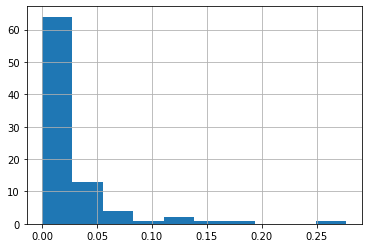

In [49]:
df['arpu'].hist();

**Для части кампаний не было покупок внутри приложения**, поэтому ARPU равен 0. Значения ARPU для большей части находятся в пределах до 0.05 у.е.

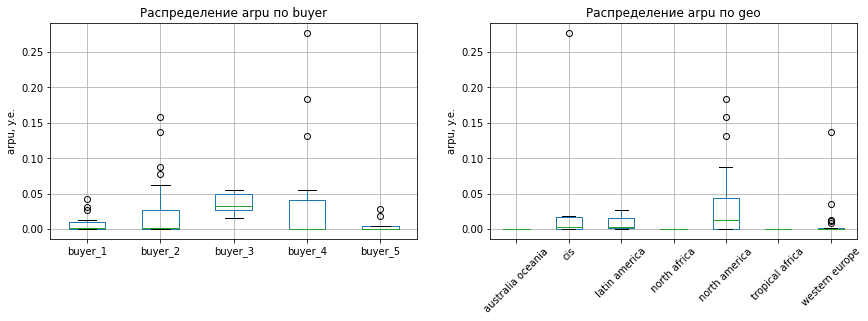

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'arpu', 'buyer', 0, 'y.e.')
boxplot_func(df, 'arpu', 'geo', 1, 'y.e.')

**Наиболее высокие показатели ARPU характерны для медиабайров №4 и №2.** Медиана ARPU для всех медиабайеров, кроме №3, равна 0.

**Выбросы в значении ARPU в регионе - СНГ**, Северной Америке и Восточной Европе. 

In [51]:
# кампания с максимальным значением ARPU
df.query('arpu > 0.2')[['campaign_id', 'geo', 'buyer', 'impressions', 'clicks', 'installs', 'registrations', \
                        'spend', 'revenue_in_app30d', 'payers30d','arpu']]

,campaign_id,geo,buyer,impressions,clicks,installs,registrations,spend,revenue_in_app30d,payers30d,arpu
85,86,cis,buyer_4,8334,154,58,27,20.43,7.48,1,0.277037


**Высокое значение ARPU вызвано тратами в приложении всего 1 пользователя и небольшим количеством регистраций.**

#### 3.3 ARPPU (Average Revenue Per Paying User) - in-app

**Формула для расчета:** доход на 30-й день / количество платящих пользователей на 30-й день.

In [52]:
df['arppu'] = df['revenue_in_app30d']/df['payers30d']

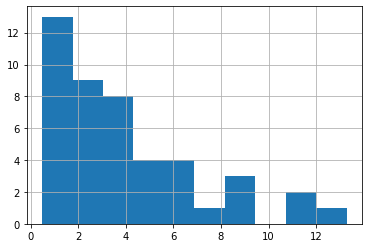

In [53]:
df['arppu'].hist();

График постепенно убывает.

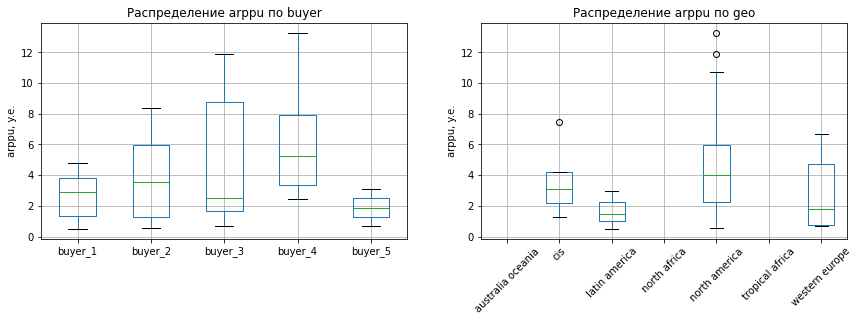

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'arppu', 'buyer', 0, 'y.e.')
boxplot_func(df, 'arppu', 'geo', 1, 'y.e.')

**Медиана ARPPU наиболее высокая для Северной Америки и стран СНГ.**

In [56]:
# топ-3 рекламных кампании по значению ARPPU
df.query('arppu > 10')[['campaign_id', 'geo', 'buyer', 'impressions', 'clicks', 'installs', 'registrations', \
                        'spend', 'revenue_in_app30d', 'payers30d', 'arpu', 'arppu']]

,campaign_id,geo,buyer,impressions,clicks,installs,registrations,spend,revenue_in_app30d,payers30d,arpu,arppu
6,7,north america,buyer_3,88809,3113,926,603,525.510010,32.160001,3,0.053333,10.720000
7,8,north america,buyer_3,113917,3966,1249,854,521.509998,47.560000,4,0.055691,11.890000
32,33,north america,buyer_4,21635,475,238,202,116.750000,26.550001,2,0.131436,13.275001


#### 3.4 Ad ARPU 

**Формула для расчета:** доход (ad) на 30-й день / количество регистраций.

Так как нет данных по действиям внутри приложения, по количеству показов и т.д. можно косвенно считать эту метрику показателем вовлеченности.

In [57]:
df['ad_arpu'] = df['revenue_ad30d']/df['registrations']

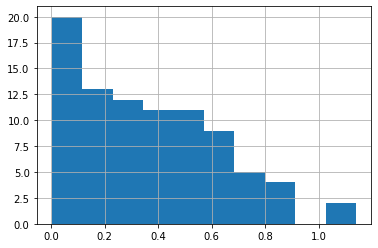

In [58]:
df['ad_arpu'].hist();

Видно, что значение Ad ARPU превышает ARPU in-app, то есть **большая часть дохода - это доход с рекламы.**

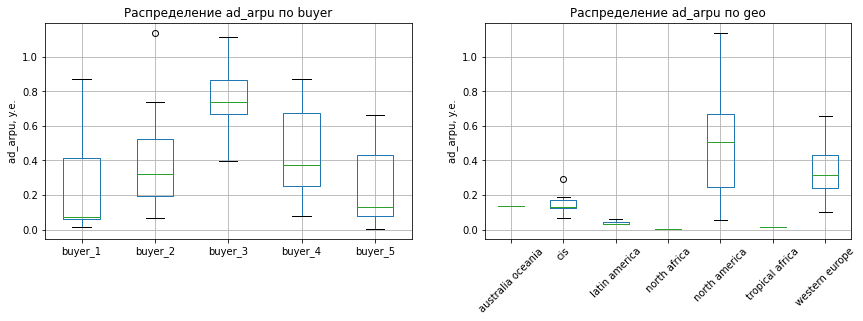

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'ad_arpu', 'buyer', 0, 'y.e.')
boxplot_func(df, 'ad_arpu', 'geo', 1, 'y.e.')

**Медиана Ad ARPU хорошо выделяется для медибайера №3** (рекламные кампании только в Северной Америке). Среди регионов выделяется Северная Америка и Восточная Европа.

In [60]:
# 2 рекламные кампании с Ad ARPU выше 1 у.е.
df[['campaign_id', 'geo', 'buyer', 'ad_arpu']].sort_values(by = 'ad_arpu', ascending = False).head(2)

,campaign_id,geo,buyer,ad_arpu
66,67,north america,buyer_2,1.138224
24,25,north america,buyer_3,1.110711


#### 3.5 ROMI

**Формула для расчета:** ROMI = (Доходы от маркетинга − Расходы на маркетинг) / Расходы на маркетинг * 100%.

Окупаемость на 30-й день

In [61]:
df['total_revenue'] = df['revenue_ad30d']+df['revenue_in_app30d']

In [62]:
df['romi'] = (df['total_revenue'] - df['spend'])/df['spend']*100

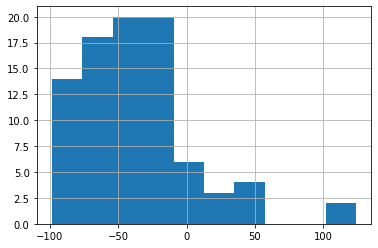

In [63]:
df['romi'].hist();

Большая часть кампаний на 30-й день не окупилась. В некоторых случаях процент стремится к -100%.

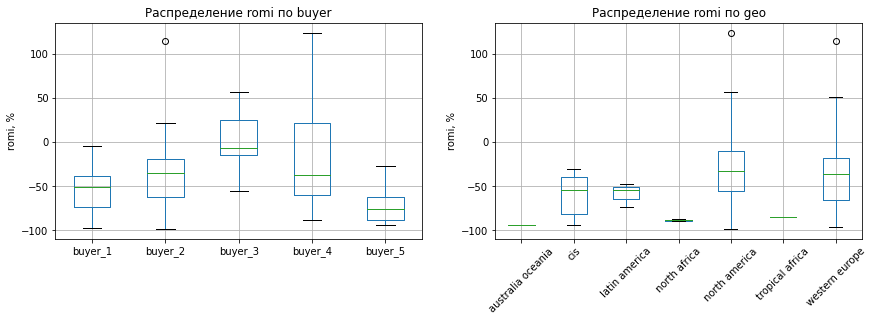

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
boxplot_func(df, 'romi', 'buyer', 0, '%')
boxplot_func(df, 'romi', 'geo', 1, '%')

Медиана ROMI для всех медиабайеров находится ниже 0. **На графиках видно, что для медиабайеров №1 и №5 нет рекламных кампаний, которые бы окупились.** Для медиабайеров №2 и №4 характерны выбросы ROMI выше 100%. Медиана ROMI наиболее приближена к 0 для медиабайра №3 (всего 6 кампаний: 2 из которых окупились). 

**Рекламные кампании, которые окупились, характерны только для 2 регионов: Северной Америки и Восточной Европы (выбросы)**, но медиана для них находится ниже 0. 

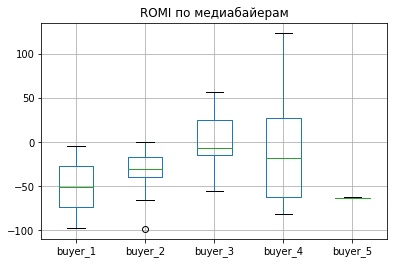

In [80]:
# так как большая часть кампаний по Северной Америке можно отдельно сравнить окупаемость по медиабайерам
df.query('geo == "north america"').boxplot(column='romi', by='buyer')
plt.title('ROMI по медиабайерам')
plt.xlabel('')
plt.suptitle('');

График похож на предыдущий, **лучший показатель у медиабайера №3, но медиана ROMI все равно ниже 0**. Худшие показатели окупаемости кампаний в Северной Америке у медиабайеров №1 и №5.  

In [66]:
# топ-5 кампаний, которые наиболее окупились 
df[['campaign_id', 'geo', 'buyer', 'impressions', 'spend', 'cr', 'cpi', 'arpu', 'ad_arpu', 'romi']].\
sort_values(by = 'romi', ascending = False).head(5).style.background_gradient()

,campaign_id,geo,buyer,impressions,spend,cr,cpi,arpu,ad_arpu,romi
62,63,north america,buyer_4,8164,29.920000,0.943165,0.467500,0.000000,0.870804,124.103927
29,30,western europe,buyer_2,49131,137.100000,0.938308,0.189627,0.001562,0.635881,114.340584
7,8,north america,buyer_3,113917,521.509998,0.749669,0.417542,0.055691,0.902786,56.955608
84,85,western europe,buyer_4,27422,20.430000,0.258916,0.180796,0.000000,0.433576,50.679897
30,31,north america,buyer_4,27598,136.879999,0.978332,0.408597,0.036111,0.713695,47.901465


Кампании от медиабайров №4, №2 и №3 в регионах Северной Америке и Восточной Европе.

Для кампаний с высокой окупаемостью характерно **высокое значение конверсии --> высокое значение Ad ARPU** (в некоторых кампаниях есть покупки внутри приложения), средняя стоимость установки.

In [68]:
# топ-5 кампаний с наименьшей окупаемостью 
df[['campaign_id', 'geo', 'buyer', 'impressions', 'spend', 'cr', 'cpi', 'arpu', 'ad_arpu', 'romi']]\
.sort_values(by = 'romi', ascending = True).head(5).style.background_gradient()

,campaign_id,geo,buyer,impressions,spend,cr,cpi,arpu,ad_arpu,romi
67,68,north america,buyer_2,3815,25.760000,0.052425,0.357778,0.000000,0.184332,-98.568855
64,65,north america,buyer_1,23016,27.900000,0.047793,0.110277,0.000000,0.055115,-97.827014
79,80,western europe,buyer_2,8981,21.950001,0.044538,0.137188,0.000000,0.203914,-96.284028
80,81,australia oceania,buyer_5,2185,21.549999,0.411899,2.155000,0.000000,0.134740,-94.372789
58,59,cis,buyer_2,40633,41.910000,0.100903,0.210603,0.000000,0.066155,-93.528151


**Кампании от медиабайров №2, №5 и №1 в регионах Северной Америке, Австралии, Восточной Европе и СНГ.** 

Для кампаний с низкой окупаемостью характерно **низкое значение конверсии --> низкое значение Ad ARPU**, средняя стоимость установки (кроме выброса в Австралии).

**Рассмотрим, есть ли зависимость между ROMI и метриками.**

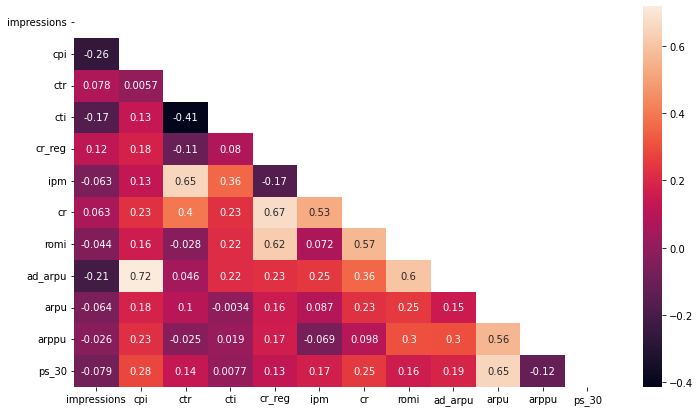

In [69]:
# корреляционная матрица
mask = np.triu(np.ones_like(df.query('cpi < 2')[['impressions', 'cpi', 'ctr', 'cti', 'cr_reg', 'ipm', 'cr', 'romi', 'ad_arpu', 
                                'arpu', 'arppu', 'ps_30']].corr()))  

fig, ax = plt.subplots(figsize=(12,7))  
sns.heatmap(df.query('cpi < 2')[['impressions', 'cpi', 'ctr', 'cti', 'cr_reg', 'ipm', 'cr', 'romi', 'ad_arpu', 
                                'arpu', 'arppu', 'ps_30']].corr(), annot = True, ax = ax, mask = mask);

**Есть средняя положительная зависимость между CPI и Ad ARPU (0.72)**, между ROMI и CR_reg также есть средняя положительная зависимость, между ROMI и Ad ARPU (так как большая часть дохода приходит с рекламы).

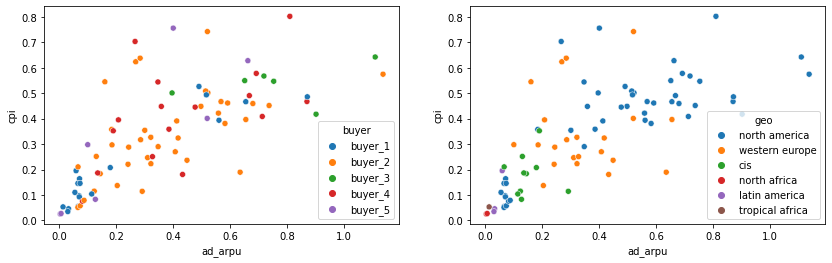

In [72]:
# график рассеяния для CPI и Ad ARPU
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df.query('cpi < 2'), x = 'ad_arpu', y = 'cpi', hue = 'buyer')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df.query('cpi < 2'), x = 'ad_arpu', y = 'cpi', hue = 'geo');

Можно предположить, что **чем выше цена установки (CPI), тем более вовлеченные пользователи, то есть Ad ARPU выше.** Скорее всего это связано с фактором региона, так как для Северной Америке большая часть точек находится около значений CPI 0.3-0.6, а значение Ad ARPU от 0.4 до 0.8. 

**Среди медиабайеров выделяется №2, для которого хорошо видна линейная зависимость**, но это скорее вызвано различием регионов (так как у данного медиабайера кампании по Северной Америке, Восточной Европе и СНГ).

In [99]:
df.groupby(['geo', 'buyer'])[['arpu', 'arppu', 'ps_30', 'ad_arpu', 'cpi', 'romi']].mean().style.background_gradient()

По среднему значению ROMI для всех кампаний по медиабайерам и регионам **только у медиабайера №3 значение выше 0**, что скорее всего связано с тем, что рекламные кампании только в Северной Америке. У данного медиабайера также самый высокий Ad ARPU. 

Высокие средние показатели ARPU и ARPPU у медиабайера №4 по СНГ.

**Выводы:**

1) **Наибольшая медиана доли платящих характерна для медибайера №3 и достигает в среднем 1.3% на 30-й день.** Для регионов Австралии и Африки нет платящих пользователей. 

2) Для части кампаний не было покупок внутри приложения, поэтому ARPU равен 0. **Значения ARPU для большей части находятся в пределах до 0.05 у.е.** Наиболее высокие показатели ARPU характерны для медиабайров №4 и №2. **Медиана ARPU для всех медиабайеров, кроме №3, равна 0.**

3) Значение Ad ARPU превышает ARPU in-app, то есть **большая часть дохода - это доход с рекламы.**

4) **Медиана Ad ARPU хорошо выделяется для медибайера №3 (рекламные кампании только в Северной Америке). Среди регионов выделяется Северная Америка и Восточная Европа.**

5) **Большая часть кампаний на 30-й день не окупилась.** В некоторых случаях процент стремится к -100%. Медиана ROMI для всех медиабайеров находится ниже 0. **Для медиабайеров №1 и №5 нет рекламных кампаний, которые бы окупились.** Для медиабайеров №2 и №4 характерны выбросы ROMI выше 100%. 

6) Рекламные кампании, которые окупились, характерны только для 2 регионов: Северной Америки и Восточной Европы (выбросы), но медиана для них находится ниже 0. **Худшие показатели окупаемости кампаний в Северной Америке у медиабайеров №1 и №5.**

7) Для кампаний с **высокой окупаемостью характерно высокое значение конверсии --> высокое значение Ad ARPU** (в некоторых кампаниях есть покупки внутри приложения), средняя стоимость установки.

8) Чем выше цена установки (CPI), тем более вовлеченные пользователи, то есть Ad ARPU выше, что в большей степени связано с фактором региона.

**Рекомендации:**

1. **Рекомендуется снизить количество рекламных кампаний в Северной Америке у медиабайров №1 и №3,** так как несмотря на более низкое значение CPI у данных медиабайеров не было кампаний, которые бы окупились. Для них характерно более низкое значение общей конверсии и Ad ARPU (по сравнению с другими медиабайерами в этом же регионе).

2. Для региона – Восточная Европа лучше показатели по окупаемости у медиабайера №2 (выброс с высокой окупаемостью) и №4, так как больше установок и регистраций и выше значение Ad ARPU по сравнению с медиабайером №5. **Возможно стоит отказаться от кампаний в этом регионе от медиабайера №5 (данных мало).**

3. Для региона СНГ лучшая кампания по окупаемости от медиабайера №1, что скорее всего вызвано более дешевыми установками. Наиболее высокие показатели ARPU для данного региона у медиабайера №4 (данных мало).  

4. Несмотря на дешевые установки для кампаний из регионов Африки, Латинской Америки **стоит проанализировать данную целевую аудиторию, потому что кампании в этих регионах имеют низкие показатели окупаемости, «вовлеченности» и отсутствие платящих пользователей.**